Tabris Loveless
10/1/2022

This graph is the daily global horizontal irradiance taken at 20:00 UTC at UNLV in 2020.
This data is used for solar panel installations outputs.
Data collected from https://nsrdb.nrel.gov/ from the U.S. Department of Energy.

Fortier Transform of data from homework 8

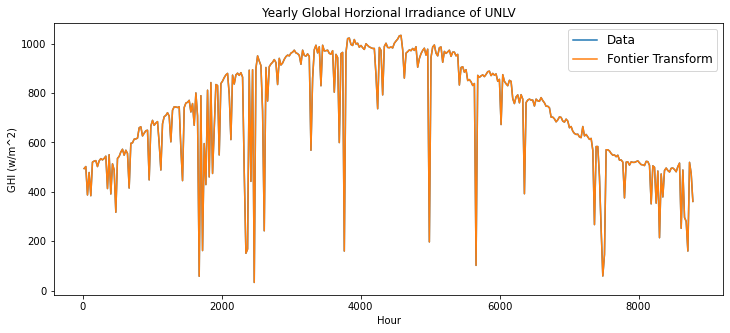

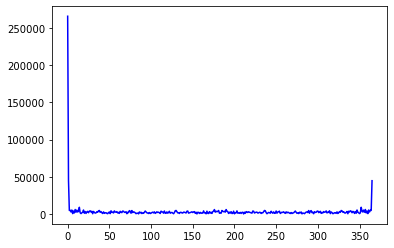

In [3]:
import matplotlib.pyplot as plt
import math
import numpy as np
from cmath import exp, pi

def dft(y):
    """
    preforms decrete fourier tranform
    Args
    y: list
        input list of y values
    """
    n = len(y)
    c = np.zeros(n, complex)
    for k in range(n):
        for l in range(n):
            c[k] += y[l]*exp(-2j*pi*k*l/n)
    return c
                             
                             
def idft(c):
    n = len(c)
    y = np.zeros(n, complex)
    for k in range(n):
        for l in range(n):
            y[k] += c[l]*exp(2j*pi*k*l/n) 
    return y

def readdata(file):
    """
    Used to read .txt file 
    
    Args:
    file (string): 
        file path
    """
    file = open(file, "r")
    lines = file.readlines()
    
    #processes line into int value
    for i in range(len(lines)):
        lines[i] = int(lines[i])
    
    return lines

def dataplot(order, x, data):
    """
    Plots graph of given data, and provides a polyfit of given order.
    
    Args
    order: int
        sets the polyfit order.
    x: list
        given x values.
    data: list
        given y values.
    """
    #constructs line of best fit
    fit = dft(data)
    y_p = idft(fit).real/len(x)
    
    #plotting
    fig = plt.figure(figsize=(12, 5))
    plt.plot(x, data, label = 'Data')
    plt.plot(x, y_p, label = 'Fontier Transform')
    plt.legend(fontsize=12)
    plt.title('Yearly Global Horzional Irradiance of UNLV')
    plt.xlabel('Hour')
    plt.ylabel('GHI (w/m^2)')

    plt.show
    fig, ax1 = plt.subplots()
    ax1.plot(np.abs(fit), 'b-', label='Magnitude')
    plt.show

ghiarr = readdata("C:\\Users\\Longinus\\Desktop\\School work\\Fall 2022\\ComputationalPhysics300-master\\homework\\GHI_Data.txt")
#converts hours into peak hour
x = range(21,len(ghiarr), 24)
data = []
for i in x:
    data.append(ghiarr[i])

dataplot(3,x,data)



